In [43]:
import polars as pl
import os
import matplotlib.pyplot as plt
import pywt
import numpy as np

In [44]:
data = "seismic_data/data"
# get all files in the data directory and its subdirectories

files = []
for root, dirs, file in os.walk(data):
    for f in file:
        files.append(os.path.join(root, f))

# read all files into a single DataFrame
files = sorted(files)

In [45]:
files

['seismic_data/data/test/mars/0001.csv',
 'seismic_data/data/test/mars/0002.csv',
 'seismic_data/data/test/mars/0007.csv',
 'seismic_data/data/test/mars/0011.csv',
 'seismic_data/data/test/mars/0017.csv',
 'seismic_data/data/test/mars/0032.csv',
 'seismic_data/data/test/mars/0033.csv',
 'seismic_data/data/test/mars/0034.csv',
 'seismic_data/data/test/mars/0041.csv',
 'seismic_data/data/test/moon/12_b_00006.csv',
 'seismic_data/data/test/moon/12_b_00007.csv',
 'seismic_data/data/test/moon/12_b_00014.csv',
 'seismic_data/data/test/moon/12_b_00016.csv',
 'seismic_data/data/test/moon/12_b_00018.csv',
 'seismic_data/data/test/moon/12_b_00020.csv',
 'seismic_data/data/test/moon/12_b_00021.csv',
 'seismic_data/data/test/moon/12_b_00026.csv',
 'seismic_data/data/test/moon/12_b_00027.csv',
 'seismic_data/data/test/moon/12_b_00028.csv',
 'seismic_data/data/test/moon/12_b_00029.csv',
 'seismic_data/data/test/moon/12_b_00031.csv',
 'seismic_data/data/test/moon/12_b_00035.csv',
 'seismic_data/data/

In [46]:
sample = pl.read_csv(files[0])

In [47]:
sample

mq,time_rel,velocity
i64,f64,f64
0,0.0,0.0
0,0.05,0.004076
0,0.1,0.00731
0,0.15,-0.002066
0,0.2,0.003964
…,…,…
0,3599.7,0.05322
0,3599.75,0.008931
0,3599.8,-0.012888


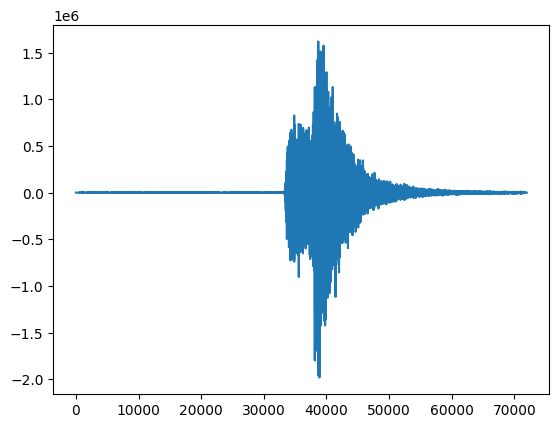

In [48]:
plt.plot(sample["velocity"])

In [49]:
sample_velocity=sample["velocity"].to_numpy()
sample_velocity.dtype

dtype('float64')

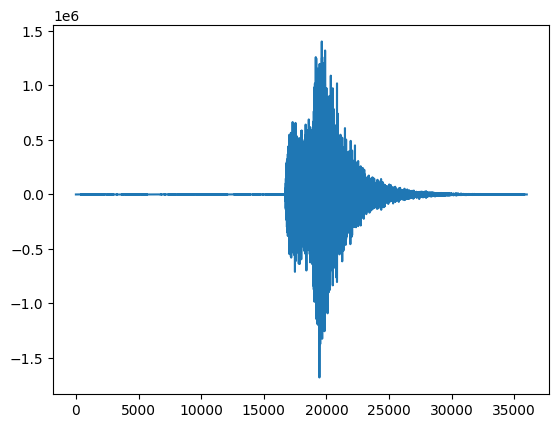

In [50]:
a, d = pywt.dwt(sample_velocity, "db4")
d = np.array(d)
# plt.plot(a)
plt.plot(d)

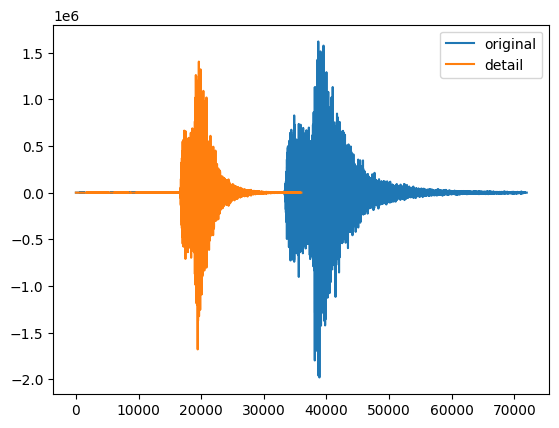

In [51]:
plt.plot(sample_velocity, label="original")
# plt.plot(a, label="approximation")
plt.plot(d, label="detail")
plt.legend()
plt.show()

In [58]:
for file in files:
    df = pl.read_csv(file)
    df = df.with_columns(df["velocity"].cast(pl.Float64).alias("velocity"))
    _, d = pywt.dwt(df["velocity"].to_numpy(), "db4")
    d = np.array(d)
    len_old_velocity = len(df["velocity"])
    len_new_velocity = len(d)
    if len_old_velocity > len_new_velocity:
        d = np.insert(d, 0, [0] * (len_old_velocity - len_new_velocity))
    df = df.with_columns(pl.Series(d).alias("velocity_processed"))
    df.write_csv(file)